<a href="https://colab.research.google.com/github/hemrajojha/CSC410/blob/main/beam_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline


# Beam Search

Beam search with dynamic beam width.

The progressive widening beam search repeatedly executes a beam search
with increasing beam width until the target node is found.


In [3]:
import math

import matplotlib.pyplot as plt
import networkx as nx


def progressive_widening_search(G, source, value, condition, initial_width=1):
    """Progressive widening beam search to find a node.

    The progressive widening beam search involves a repeated beam
    search, starting with a small beam width then extending to
    progressively larger beam widths if the target node is not
    found. This implementation simply returns the first node found that
    matches the termination condition.

    `G` is a NetworkX graph.

    `source` is a node in the graph. The search for the node of interest
    begins here and extends only to those nodes in the (weakly)
    connected component of this node.

    `value` is a function that returns a real number indicating how good
    a potential neighbor node is when deciding which neighbor nodes to
    enqueue in the breadth-first search. Only the best nodes within the
    current beam width will be enqueued at each step.

    `condition` is the termination condition for the search. This is a
    function that takes a node as input and return a Boolean indicating
    whether the node is the target. If no node matches the termination
    condition, this function raises :exc:`NodeNotFound`.

    `initial_width` is the starting beam width for the beam search (the
    default is one). If no node matching the `condition` is found with
    this beam width, the beam search is restarted from the `source` node
    with a beam width that is twice as large (so the beam width
    increases exponentially). The search terminates after the beam width
    exceeds the number of nodes in the graph.

    """
    # Check for the special case in which the source node satisfies the
    # termination condition.
    if condition(source):
        return source
    # The largest possible value of `i` in this range yields a width at
    # least the number of nodes in the graph, so the final invocation of
    # `bfs_beam_edges` is equivalent to a plain old breadth-first
    # search. Therefore, all nodes will eventually be visited.
    log_m = math.ceil(math.log2(len(G)))
    for i in range(log_m):
        width = initial_width * pow(2, i)
        # Since we are always starting from the same source node, this
        # search may visit the same nodes many times (depending on the
        # implementation of the `value` function).
        for u, v in nx.bfs_beam_edges(G, source, value, width):
            if condition(v):
                return v
    # At this point, since all nodes have been visited, we know that
    # none of the nodes satisfied the termination condition.
    raise nx.NodeNotFound("no node satisfied the termination condition")

## Search for a node with high centrality.

We generate a random graph, compute the centrality of each node, then perform
the progressive widening search in order to find a node of high centrality.



found node 73 with centrality 0.12598283530728405


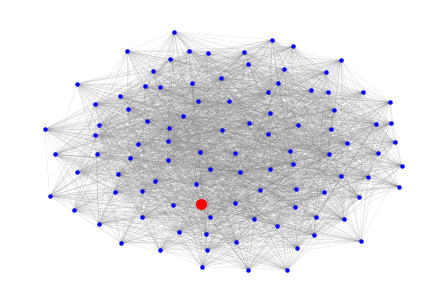

In [4]:
# Set a seed for random number generation so the example is reproducible
seed = 89

G = nx.gnp_random_graph(100, 0.5, seed=seed)
centrality = nx.eigenvector_centrality(G)
avg_centrality = sum(centrality.values()) / len(G)


def has_high_centrality(v):
    return centrality[v] >= avg_centrality


source = 0
value = centrality.get
condition = has_high_centrality

found_node = progressive_widening_search(G, source, value, condition)
c = centrality[found_node]
print(f"found node {found_node} with centrality {c}")


# Draw graph
pos = nx.spring_layout(G, seed=seed)
options = {
    "node_color": "blue",
    "node_size": 20,
    "edge_color": "grey",
    "linewidths": 0,
    "width": 0.1,
}
nx.draw(G, pos, **options)
# Draw node with high centrality as large and red
nx.draw_networkx_nodes(G, pos, nodelist=[found_node], node_size=100, node_color="r")
plt.show()

In [30]:
#beam search decoder in natural language processing
#https://tutorials.one/how-to-implement-a-beam-search-decoder-for-natural-language-processing/
#generate probability distributions across vocabulary of output words
#candidate sequence of words are scored based on their likelihood
#beam search expands all possible next steps and keeps the 'k' most likely
from math import log
from numpy import array
from numpy import argmax

In [44]:
#beam search
def beam_search_decoder(data,k):
  sequences=[[list(),1.0]]
  #walk over each step in sequence 
  for row in data:
    print(row)
    all_candidates=list()
    #expand each current candidate
    for i in range(len(sequences)):
      seq,score=sequences[i]
      print(seq)
      print(score)
      for j in range(len(row)):
        candidate = [seq+[j],score*-log(row[j])]
        print(candidate)
        all_candidates.append(candidate)
  #order all candidates by score
  ordered = sorted(all_candidates,key=lambda tup:tup[1])
  print(ordered)
  #select k best
  sequences=ordered[:3]
  print(sequences)
  return sequences

In [19]:
#define a sequence of 10 words over a vocab of 5 words
data=[
      [0.1,0.2,0.3,0.4,0.5],
      [0.5,0.4,0.3,0.2,0.1],
      [0.1,0.2,0.3,0.4,0.5],
      [0.5,0.4,0.3,0.2,0.1],
      [0.1,0.2,0.3,0.4,0.5],
      [0.5,0.4,0.3,0.2,0.1],
      [0.1,0.2,0.3,0.4,0.5],
      [0.5,0.4,0.3,0.2,0.1],
      [0.1,0.2,0.3,0.4,0.5],
      [0.5,0.4,0.3,0.2,0.1],
      ]
data=array(data)


In [28]:
#We assume that words have been integer coded, such that the column index can be used
#to look-up the associated word in the vocabulary. Therefore, the task of
#decoding becomes the task of selecting a sequence of inetgers from the probability distributions.


In [45]:
result = beam_search_decoder(data,3)
print(result)

[0.1 0.2 0.3 0.4 0.5]
[]
1.0
[[0], 2.3025850929940455]
[[1], 1.6094379124341003]
[[2], 1.2039728043259361]
[[3], 0.916290731874155]
[[4], 0.6931471805599453]
[0.5 0.4 0.3 0.2 0.1]
[]
1.0
[[0], 0.6931471805599453]
[[1], 0.916290731874155]
[[2], 1.2039728043259361]
[[3], 1.6094379124341003]
[[4], 2.3025850929940455]
[0.1 0.2 0.3 0.4 0.5]
[]
1.0
[[0], 2.3025850929940455]
[[1], 1.6094379124341003]
[[2], 1.2039728043259361]
[[3], 0.916290731874155]
[[4], 0.6931471805599453]
[0.5 0.4 0.3 0.2 0.1]
[]
1.0
[[0], 0.6931471805599453]
[[1], 0.916290731874155]
[[2], 1.2039728043259361]
[[3], 1.6094379124341003]
[[4], 2.3025850929940455]
[0.1 0.2 0.3 0.4 0.5]
[]
1.0
[[0], 2.3025850929940455]
[[1], 1.6094379124341003]
[[2], 1.2039728043259361]
[[3], 0.916290731874155]
[[4], 0.6931471805599453]
[0.5 0.4 0.3 0.2 0.1]
[]
1.0
[[0], 0.6931471805599453]
[[1], 0.916290731874155]
[[2], 1.2039728043259361]
[[3], 1.6094379124341003]
[[4], 2.3025850929940455]
[0.1 0.2 0.3 0.4 0.5]
[]
1.0
[[0], 2.302585092994045